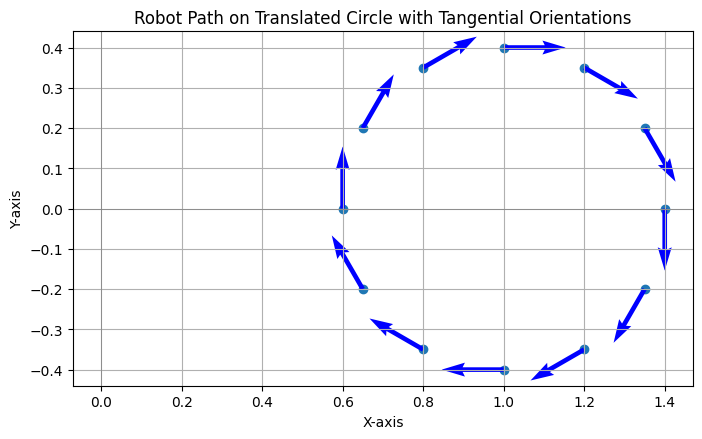

std::make_tuple(0.6, 0.0, 90.0 * piRad),
std::make_tuple(0.65, 0.2, 60.0 * piRad),
std::make_tuple(0.8, 0.35, 30.0 * piRad),
std::make_tuple(1.0, 0.4, 0.0 * piRad),
std::make_tuple(1.2, 0.35, -30.0 * piRad),
std::make_tuple(1.35, 0.2, -60.0 * piRad),
std::make_tuple(1.4, 0.0, -90.0 * piRad),
std::make_tuple(1.35, -0.2, -120.0 * piRad),
std::make_tuple(1.2, -0.35, -150.0 * piRad),
std::make_tuple(1.0, -0.4, -180.0 * piRad),
std::make_tuple(0.8, -0.35, 150.0 * piRad),
std::make_tuple(0.65, -0.2, 120.0 * piRad),


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def create_points_for_robot(radius, num_points, dx, dy):
    """
    Create points and orientations for a differential drive robot to follow a circular path,
    starting from the point lowest in the x-direction (180 degrees) and moving counterclockwise,
    with orientation tangential to the circle and angles wrapped from -pi to pi.
    """

    # Angles for each point (starting at 180 degrees and moving counterclockwise)
    angles = np.linspace(np.pi, -np.pi, num_points, endpoint=False)

    # Circle points (without translation)
    x_points = radius * np.cos(angles)
    y_points = radius * np.sin(angles)

    # Translate points
    x_translated = x_points + dx
    y_translated = y_points + dy

    # Calculate tangential orientations (counterclockwise)
    tangential_angles = np.degrees(angles - np.pi/2)
    
    # Normalize angles between -180 and 180
    tangential_angles = (tangential_angles + 180) % 360 - 180

    # Round coordinates and orientations to 2 decimal places
    x_translated = np.round(x_translated, 2)
    y_translated = np.round(y_translated, 2)
    tangential_angles = np.round(tangential_angles, 2)

    # Plotting for visualization
    plt.figure(figsize=(8, 8))
    plt.scatter(x_translated, y_translated) # Translated points
    for i, angle in enumerate(tangential_angles):
        plt.quiver(x_translated[i], y_translated[i], np.cos(np.radians(angle)), np.sin(np.radians(angle)), scale=10, color='blue')
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Robot Path on Translated Circle with Tangential Orientations')
    plt.grid(True)
    plt.show()

    # Print in C++ tuple format
    for x, y, angle in zip(x_translated, y_translated, tangential_angles):
        print(f"std::make_tuple({x}, {y}, {angle} * piRad),")

# Example usage
radius = 0.4  # For a circle with radius 0.4
num_points = 8  # To generate 12 points
dx, dy = 1, 0  # To translate each point by (1, 0)

create_points_for_robot(radius, num_points, dx, dy)

